In [1]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger
from tuxai.report import model_metrics, Report, FeatureImportanceReport

config_logger()
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100

fir = FeatureImportanceReport(use_cache="fi_const_2023")

2023-01-25 17:12:22,533 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023


# Options always importants
## (after bug fix)
### without option merging

In [2]:
df_ai = fir.options_always_importants(target="vmlinux", rank=30,collinearity=True, merge_groups=False, allow_version_gap=True).set_index("options")
df_ai

  0%|          | 0/12369 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS",<NA>,0,0,1,1,1,1
RANDOMIZE_BASE,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
DEBUG_INFO,2,2,2,2,2,2,2
"KASAN, KASAN_OUTLINE",3,3,3,<NA>,<NA>,<NA>,<NA>
"KASAN, KASAN_GENERIC, KASAN_OUTLINE",<NA>,<NA>,<NA>,3,3,3,<NA>
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,4,<NA>
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7


### With option merging

In [3]:
df_ai = fir.options_always_importants(target="vmlinux", rank=30,collinearity=True, merge_groups=True, allow_version_gap=True).set_index("options")
df_ai

  0%|          | 0/12369 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,0,1,1,1,1
DEBUG_INFO,2,2,2,2,2,2,2
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
"KASAN, KASAN_GENERIC, KASAN_OUTLINE",<NA>,<NA>,<NA>,3,3,3,<NA>
"KASAN, KASAN_GENERIC(5.00, 5.04, 5.07), KASAN_OUTLINE",3,3,3,3,3,3,<NA>
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL(5.08), DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,4,3
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7
DEBUG_INFO_COMPRESSED,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5


## no version gap

In [4]:
df_ai = fir.options_always_importants(target="vmlinux", rank=40, collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_ai

  0%|          | 0/8665 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,0,1,1,1,1
DEBUG_INFO,2,2,2,2,2,2,2
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7
DEBUG_INFO_REDUCED,5,6,5,5,6,5,4
"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS",37,0,0,1,1,1,1
DEBUG_INFO_SPLIT,6,5,6,6,8,6,8
GCOV_PROFILE_ALL,7,7,8,7,7,7,6
UBSAN_ALIGNMENT,8,8,7,8,9,9,9


# Options not always importants (stop or start beeing important)

no version gap, merged

In [3]:
df_nai = fir.options_not_always_importants(target="vmlinux", best_rank=30, worst_rank=500, collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_nai

  0%|          | 0/8344 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
SND_SOC_WM_ADSP,145,181,1210,1154,203,310,29
"CLKSRC_MMIO, COMPILE_TEST(4.13, 4.15, 4.20, 5.00, 5.04), ROCKCHIP_GRF(4.13, 4.15, 4.20, 5.00, 5.04), SOC_ASPEED(5.04)",21,47,80,1305,2161,564,110
"PROVE_LOCKING, PROVE_RCU",48,48,129,4714,12,19,11
"BRANCH_PROFILE_NONE, FTRACE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",25,22,1625,555,1434,1371,1300
XFS_DEBUG,9,10,9,10,11,10,9425
"CLKSRC_MMIO(4.13, 4.15, 4.20, 5.00, 5.04), COMPILE_TEST, IMX_INTMUX(5.07, 5.08), ROCKCHIP_GRF, SOC_ASPEED(5.04, 5.07, 5.08)",21,47,80,1305,2161,5777,234
"REGMAP_AC97(4.13), SND_SOC_AD1980(4.13, 4.15, 4.20, 5.00, 5.04), SND_SOC_AD73311, SND_SOC_ADS117X, SND_SOC_ALL_CODECS, SND_SOC_CQ0093VC, SND_SOC_CS47L15(5.07, 5.08), SND_SOC_CS47L35(5.07, 5.08), SND_SOC_CS47L85(5.07, 5.08), SND_SOC_CS47L90(5.07, 5.08), SND_SOC_CS47L92(5.07, 5.08), SND_SOC_ICS43432, SND_SOC_L3, SND_SOC_MADERA(5.07, 5.08), SND_SOC_PCM3008, SND_SOC_PCM5102A, SND_SOC_STAC9766(4.13, 4.15, 4.20, 5.00, 5.04), SND_SOC_UDA134X, SND_SOC_WL1273(5.07, 5.08), SND_SOC_WM8727, SND_SOC_WM8782(4.13, 4.15), SND_SOC_WM9705(4.13, 4.15, 4.20, 5.00, 5.04), SND_SOC_WM9712(4.13), SND_SOC_WM9713(4.13, 4.15, 4.20, 5.00, 5.04)",85,82,5134,1349,4028,37,21
"BRANCH_PROFILE_NONE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), FTRACE",7749,22,1625,555,1434,1371,1300
GENERIC_TRACER,33,27,499,1913,4145,4432,4798


No version gap, not merged

In [5]:
df_nai = fir.options_not_always_importants(target="vmlinux", best_rank=50, worst_rank=500, collinearity=True, merge_groups=False, allow_version_gap=False).set_index("options")
df_nai

  0%|          | 0/8096 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
"NET, NET_RX_BUSY_POLL, NLATTR",45,113,82,89,532,69,56
XPS,50,52,63,57,216,581,205
"GRACE_PERIOD, LOCKD, SUNRPC",174,39,224,45,153,608,86
AF_RXRPC,130,116,69,40,1154,76,112
GFS2_FS,1437,38,47,48,120,82,69
FUNCTION_TRACER,60,44,92,74,270,1987,48
AC97_BUS,1098,913,216,237,38,55,91
SND_SOC_WM_ADSP,145,181,1210,1154,203,310,29
"PROVE_LOCKING, PROVE_RCU",48,48,129,4714,12,19,11


## Check option YES frequency

In [6]:
fir.add_yes_frequencies(df_nai, str_pct=True)

  0%|          | 0/7 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08,freq 4.13,freq 4.15,freq 4.20,freq 5.00,freq 5.04,freq 5.07,freq 5.08
88EU_AP_MODE,47,8034,8700,8794,9265,9637,9838,0.33%,0.36%,0.38%,0.38%,0.38%,0.39%,0.40%
9P_FS,413,485,50,453,534,3627,3594,3.32%,3.44%,3.42%,3.12%,3.22%,3.43%,3.32%
A11Y_BRAILLE_CONSOLE,3668,938,4288,474,43,177,111,10.06%,10.46%,10.59%,10.34%,10.64%,10.13%,10.76%
AC97_BUS,1098,913,216,237,38,55,91,16.93%,17.12%,16.55%,16.39%,16.17%,15.45%,16.20%
ACPI_HOTPLUG_CPU,70,80,7699,36,61,111,526,13.90%,14.43%,8.23%,16.92%,19.54%,19.77%,20.36%
AF_RXRPC,130,116,69,40,1154,76,112,14.67%,15.25%,14.93%,14.45%,14.64%,15.05%,14.94%
CEPH_LIB,182,463,125,39,169,106,4886,15.97%,16.30%,16.10%,15.69%,16.18%,16.42%,16.36%
CIFS,114,8330,40,97,1853,528,127,5.95%,6.15%,5.99%,5.83%,6.16%,6.10%,6.06%
DEBUG_KMEMLEAK,990,5518,6025,6090,14,15,12,44.16%,43.88%,43.26%,43.54%,44.13%,43.32%,42.74%
DRM_I915_WERROR,6414,137,44,185,1541,279,1406,4.83%,4.92%,4.13%,4.12%,4.02%,4.18%,3.90%


# Drop outliers

<AxesSubplot: ylabel='Frequency'>

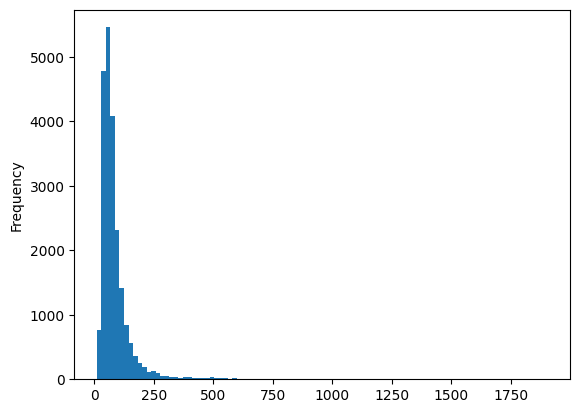

In [5]:
df1 = Dataset(508).get_dataframe(drop_outliers=False)
df1.vmlinux.plot.hist(bins=100)

2023-01-25 17:15:53,439 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours


<AxesSubplot: ylabel='Frequency'>

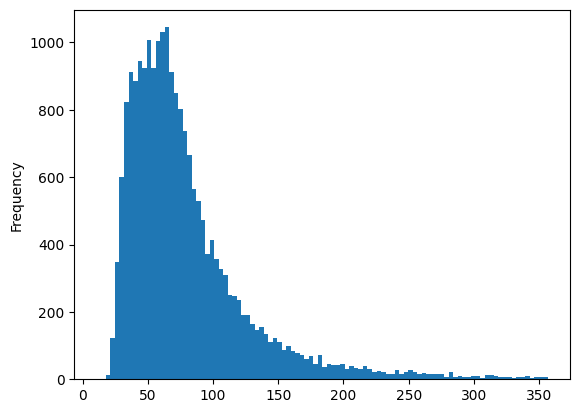

In [6]:
df1 = Dataset(508).get_dataframe(drop_outliers=True)
df1.vmlinux.plot.hist(bins=100)

# Drop outliers

In [ ]:
fir_no = FeatureImportanceReport(use_cache="fi_const_2023_no", drop_outliers=True)
df_ai = fir.options_always_importants(target="vmlinux", rank=30,collinearity=True, merge_groups=True, allow_version_gap=True).set_index("options")
df_ai